In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.io import loadmat
from scipy.ndimage import gaussian_filter1d

Q1:

b

In [7]:
fs = 500 #samples/second
t= np.array(np.arange(0,2,1/fs)) # time of the samples taken
x_t = np.multiply(np.cos(2*np.pi*110*t), np.cos(2*np.pi*10*t)) # the samples of the given signal

Text(0.5, 1.0, 'Signal amplitude as function of time')

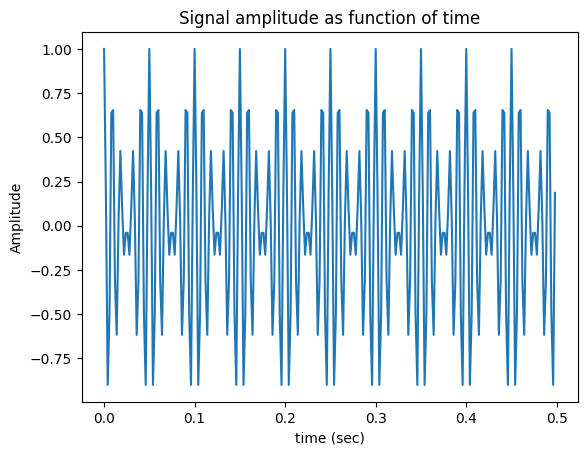

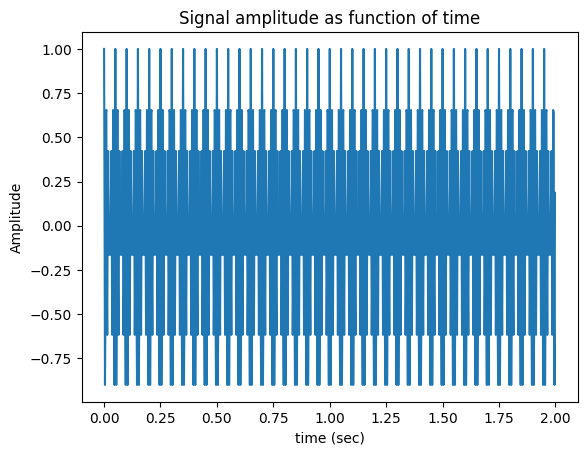

In [ ]:
plt.plot(t[0:int(len(t)/4)], x_t[0:int(len(t)/4)]) # plot 0.5 a second of recording 
plt.xlabel('time (sec)')
plt.ylabel('Amplitude')
plt.title('Signal amplitude as function of time')
plt.figure()
plt.plot(t, x_t) # plot the whole 2 seconds
plt.xlabel('time (sec)')
plt.ylabel('Amplitude')
plt.title('Signal amplitude as function of time')

c

In [ ]:
# Calculate the maximal frequency and minimal sampling rate
a=10
b=110
fmin = b-a
fmax= b+a
fs_min = fmax*2
print("The minimal sampling rate required for no aliasing:", fs_min)

The minimal sampling rate required for no aliasing: 240


d+e

In [453]:
fs = 250 #samples/second
t_record = 40 #sec
t= np.array(np.arange(0,t_record,1/fs))
x_t = np.multiply(np.cos(2*np.pi*110*t), np.cos(2*np.pi*10*t))

Text(0.5, 1.0, 'Spectrum (fs=250Hz, time=40sec)')

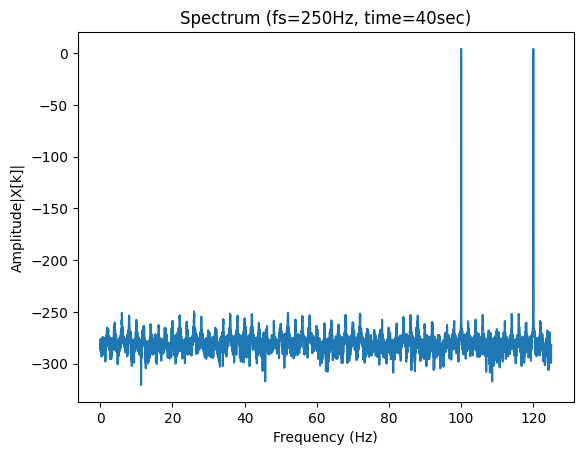

In [ ]:
X_k = np.abs(np.fft.fft(x_t)) # amplitude measure of spectrum
X_k_norm = 10*np.log10((X_k)**2/(len(x_t)*fs)) # power measure of spectrum
N = len(X_k) 
n = np.arange(N) # frequency range
T = N/fs # length of recording in seconds
freq = n/T # get real frequencies by deviding in the recording time
plt.plot(freq[0:int(len(freq)/2)], X_k_norm[0:int(len(X_k)/2)])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude|X[k]|")
plt.title("Spectrum (fs=250Hz, time=40sec)")

Q2:

In [8]:
handel = loadmat('handel.mat')
fs = handel['Fs'][0,0]
samples = handel['y'][:,0]
time = np.arange(0, len(samples)/fs, 1/fs) # time vector accordng to sampling rate

Text(0.5, 1.0, "Handel's signal as function of time")

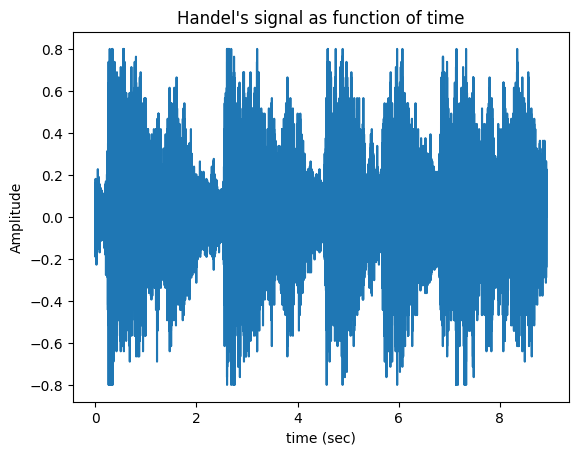

In [23]:
plt.plot(time,samples) 
plt.xlabel("time (sec)")
plt.ylabel("Amplitude")
plt.title("Handel's signal as function of time")

Text(0.5, 1.0, "Handel's Power Spectrum (using plt.psd)")

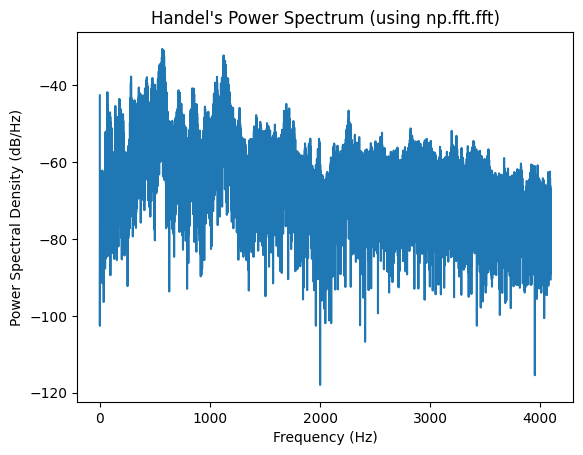

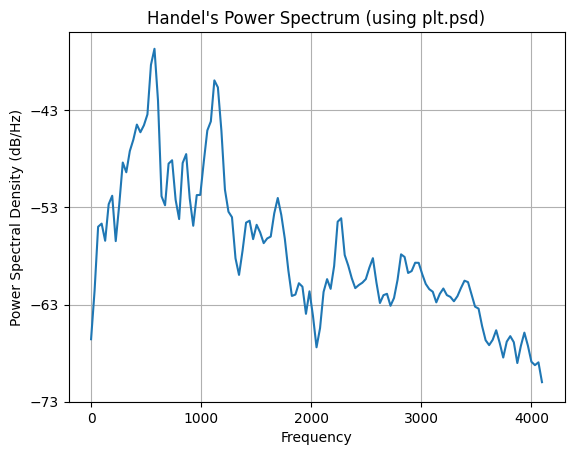

In [ ]:
# same as in previous question
X_k = np.abs(np.fft.fft(samples)) 
X_k_norm = 10*np.log10((X_k)**2/len(samples)/fs)
N = len(X_k)
n = np.arange(N)
T = N/fs
freq = n/T
plt.plot(freq[0:int(len(freq)/2)], X_k_norm[0:int(len(X_k)/2)])
plt.title("Handel's Power Spectrum (using np.fft.fft)")
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.xlabel('Frequency (Hz)')
plt.figure()
Pxx, freqs_psd = plt.psd(samples, Fs=fs)
plt.title("Handel's Power Spectrum (using plt.psd)")


In [92]:
# cut the slices of signal that contain the desired peaks
cond_1 = np.nonzero((freq>500) & (freq<1000))
cond_2 = np.nonzero((freq>1000) & (freq<1300))
# take the argument of the maximum power in each segment:
idx_1 = np.argmax(X_k_norm[cond_1])  
idx_2 = np.argmax(X_k_norm[cond_2])
freqs = [freq[cond_1][idx_1], freq[cond_2][idx_2]] # take the two frequencies with largest power
power = [np.round(np.max(X_k_norm[cond_1])), np.round(np.max(X_k_norm[cond_2]))] # take the largest powers
print(f"The frequency with maximal power: {np.round(freqs[0],2)} Hz,  {power[0]} db/Hz")
print(f"The frequency with the second maximal power: {np.round(freqs[1],2)} Hz,  {power[1]} dB/Hz")

The frequency with maximal power: 567.06 Hz,  -30.0 db/Hz
The frequency with the second maximal power: 1124.49 Hz,  -32.0 dB/Hz
